Regresión isotónica
===

* Ultima modificación: 2023-03-11 | [YouTube](https://www.youtube.com/watch?v=v3ktPwo4QS0&list=PLEFpZ3YehTnC5xAKXPgUE0J_VGZcRWONu=1)

Esta es una técnica para construir modelos de regresión unidimensionales, la cual resuelve el siguiente problema:

$$
\begin{split} 
\text{min  }  & \sum_i w_i \; (y_i - \hat{y}_i)^2 \\
\text{s/to:  } \\
             & \hat{y}_i \le \hat{y}_j \\
             & x_i \le x_j 
\end{split}
$$

![isotonic_regression.png](assets/isotonic_regression.png)

con $w_i$ > 0.

* El modelo produce las predicciones puntuales $\hat{y}_i$ para el conjunto de entrenamiento suministrado.

* El modelo realiza la interpolación para valores de $x$ que no han sido vistos antes.

* Las predicciones del modelo generan una función lineal por tramos.

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.isotonic import IsotonicRegression

n_points = 100
x_values = np.arange(n_points)

seed = 12345
rng = np.random.default_rng(seed)
y_values = rng.integers(-50, 50, size=(n_points,)) + 50.0 * np.log1p(
    np.arange(n_points)
)

In [2]:
isotonicRegression = IsotonicRegression(
    # --------------------------------------------------------------------------
    # Lower bound on the lowest predicted value (the minimum value may still be
    # higher). If not set, defaults to -inf.
    y_min=None,
    # --------------------------------------------------------------------------
    # Upper bound on the highest predicted value (the maximum may still be
    # lower). If not set, defaults to +inf.
    y_max=None,
    # --------------------------------------------------------------------------
    # Determines whether the predictions should be constrained to increase or
    # decrease with X. ‘auto’ will decide based on the Spearman correlation
    # estimate’s sign.
    increasing=True,
    # --------------------------------------------------------------------------
    # Handles how X values outside of the training domain are handled during
    # prediction.
    # * ‘nan’, predictions will be NaN.
    # * ‘clip’, predictions will be set to the value corresponding to the
    #   nearest train interval endpoint.
    # * ‘raise’, a ValueError is raised.
    out_of_bounds="clip",
)

isotonicRegression.fit(x_values, y_values)

y_pred = isotonicRegression.transform(x_values)

In [3]:
isotonicRegression.X_min_, isotonicRegression.X_max_

(0.0, 99.0)

In [4]:
isotonicRegression.X_thresholds_

array([ 0.,  1.,  2.,  4.,  5.,  6.,  7.,  8., 16., 17., 18., 19., 30.,
       31., 36., 37., 43., 44., 58., 59., 60., 64., 65., 98., 99.])

In [5]:
isotonicRegression.y_thresholds_

array([ 12.82867951,  12.82867951,  61.23907604,  61.23907604,
       114.94174046, 114.94174046, 120.97207708, 124.89150304,
       124.89150304, 159.87026843, 159.87026843, 162.38474736,
       162.38474736, 171.65324085, 171.65324085, 179.19041925,
       179.19041925, 182.12185904, 182.12185904, 213.71722811,
       221.74413329, 221.74413329, 223.0170862 , 223.0170862 ,
       242.2585093 ])

In [6]:
isotonicRegression.increasing_

True

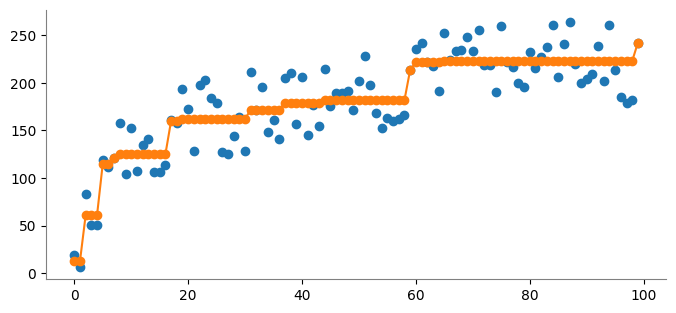

In [7]:
plt.figure(figsize=(8, 3.5))

plt.plot(x_values, y_values, marker=".", color="tab:blue", linestyle="", markersize=12)
plt.plot(x_values, y_pred, marker=".", color="tab:orange", linestyle="-", markersize=12)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()